In [1]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "C:\\Windows\\Fonts\\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

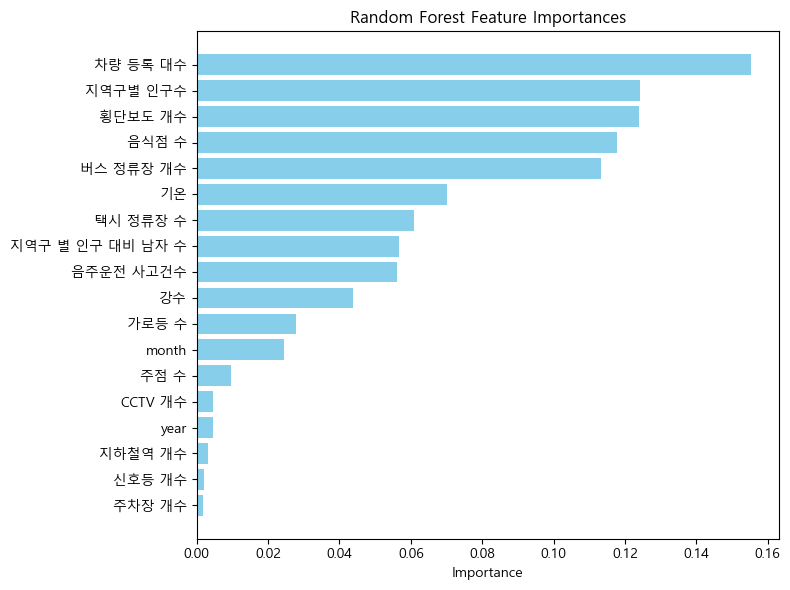

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

data = pd.read_csv('./구별데이터_3개년.csv', encoding='cp949')

data['date'] = pd.to_datetime(data['날짜'])  # 문자열 → datetime 타입으로 변환
# 연, 월, 일, 요일, 분기 등 파생 변수 생성
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# astype()에 딕셔너리를 넘겨주어 여러 열을 한 번에 변환
data = data.astype({
    '음식점 수': 'float64',
    '주점 수': 'float64',
    '버스 정류장 개수': 'float64',
    '지하철역 개수': 'float64',
    '지역구별 인구수': 'float64',
    '지역구 별 인구 대비 남자 수' : 'float64',
    '가로등 수': 'float64',
    'CCTV 개수': 'float64',
    '횡단보도 개수': 'float64',
    '신호등 개수': 'float64',
    '주차장 개수': 'float64',
    '차량 등록 대수': 'float64',
    '택시 정류장 수': 'float64',
    '강수': 'float64',
    '기온': 'float64',
    '음주운전 사고건수': 'float64',
    '음주운전 단속건수': 'float64'
})

# target 확인
target = '음주운전 단속건수'
del_col = ['부산구별', '날짜', 'date', target, 'day']

# 데이터 분리
x = data.drop(columns = del_col)
y = data.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -------------------------
# 변수 중요도 추출 & 정렬
# -------------------------
importances = rf.feature_importances_
feature_importances = sorted(zip(x.columns, importances),
                             key=lambda x: x[1],
                             reverse=True)

# 피처명과 중요도를 별도 리스트로 분리
features, importances_vals = zip(*feature_importances)

# -------------------------
# 시각화 (가로 막대)
# -------------------------
plt.figure(figsize=(8, 6))  # 그래프 크기
plt.barh(features, importances_vals, color='skyblue')
plt.gca().invert_yaxis()  # 큰 값이 위로 오게 y축 뒤집기
plt.xlabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [3]:
# -------------------------
# 예측 정확도(평가)
# -------------------------
score = rf.score(X_test, y_test)
print(f" R^2 Score: {score:.4f}")

 R^2 Score: 0.7670


In [4]:
y_pred = rf.predict(X_test)

In [5]:
print('r2_score: ', r2_score(y_test, y_pred))
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))

r2_score:  0.7670273818570105
mean_absolute_error:  4.3774137931034485


             feature           VIF
0              const  1.481779e+07
1              음식점 수  4.182460e+01
2               주점 수  9.888500e+00
3          버스 정류장 개수  5.721285e+01
4            지하철역 개수  4.072523e+00
5           지역구별 인구수  5.326425e+01
6   지역구 별 인구 대비 남자 수  1.607816e+00
7              가로등 수  9.906879e+01
8            CCTV 개수  2.081108e+00
9            횡단보도 개수  2.836459e+01
10            신호등 개수  1.963294e+01
11            주차장 개수  2.172613e+00
12          차량 등록 대수  3.632628e+01
13          택시 정류장 수  5.678010e+00
14                강수  1.959571e+00
15                기온  2.070580e+00
16         음주운전 사고건수  9.765002e+00
17              year  2.415055e+00
18             month  1.142458e+00


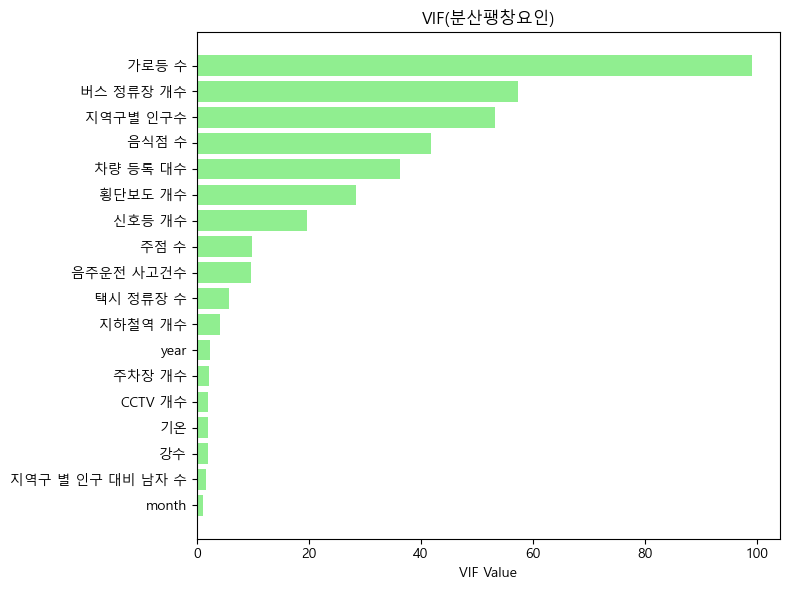

In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# -------------------------
# 1) VIF 계산
# -------------------------
# 예: x라는 DataFrame에 숫자형 변수들만 들어 있다고 가정
X = x.copy()

# 모델에 상수항 추가
X = sm.add_constant(X)

# 각 컬럼별 VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

# VIF 결과 표시
print(vif_data)

# -------------------------
# 2) 시각화
# -------------------------
# (1) 만약 'const'(상수항) 행을 그래프에서 제외하고 싶다면:
vif_plot_data = vif_data[vif_data["feature"] != "const"]

# (2) 중요도 큰 순서대로 정렬
vif_plot_data = vif_plot_data.sort_values("VIF", ascending=True)

# (3) 가로 막대 그래프
plt.figure(figsize=(8, 6))
plt.barh(vif_plot_data["feature"], vif_plot_data["VIF"], color="lightgreen")

plt.xlabel("VIF Value")
plt.title("VIF(분산팽창요인)")
plt.tight_layout()
plt.show()
